In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("engrhaseebjan/a-simple-stock-market-prediction-dataset")

print("Path to dataset files:", path)

100%|██████████| 42.0k/42.0k [00:00<00:00, 32.7MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/engrhaseebjan/a-simple-stock-market-prediction-dataset/versions/1


In [9]:
import kagglehub
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Download the dataset
dataset_path = kagglehub.dataset_download("engrhaseebjan/a-simple-stock-market-prediction-dataset")
print("Path to dataset files:", dataset_path)

# Use the correct file name and path
file_path = os.path.join(dataset_path, "dataset 2010 to 2021.csv")
data = pd.read_csv(file_path)

# Display the first few rows
print(data.head())




Path to dataset files: /kaggle/input/a-simple-stock-market-prediction-dataset
         Date      Open      High       Low     Close
0  2010-01-04  7.622500  7.660714  7.585000  7.643214
1  2010-01-05  7.664286  7.699643  7.616071  7.656429
2  2010-01-06  7.656429  7.686786  7.526786  7.534643
3  2010-01-07  7.562500  7.571429  7.466071  7.520714
4  2010-01-08  7.510714  7.571429  7.466429  7.570714


In [10]:
# Convert the 'Date' column to a datetime object
data['Date'] = pd.to_datetime(data['Date'])

# Check for missing values
print(data.isnull().sum())

# Select features (Open, High, Low) and the target variable (Close)
X = data[['Open', 'High', 'Low']]
y = data['Close']

# Print the shape of the features and target
print("Features shape:", X.shape)
print("Target shape:", y.shape)


Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64
Features shape: (2895, 3)
Target shape: (2895,)


In [11]:
from sklearn.model_selection import train_test_split

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the size of each split
print("Training set size:", len(X_train))
print("Testing set size:", len(X_test))


Training set size: 2316
Testing set size: 579


In [12]:
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Display the model's coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Coefficients: [-0.55368574  0.8094795   0.7436827 ]
Intercept: 0.00637697369398893


In [13]:
# Predict the 'Close' values for the test set
y_pred = model.predict(X_test)

# Display the first 5 predicted values alongside the actual values
for i in range(5):
    print(f"Actual: {y_test.iloc[i]:.2f}, Predicted: {y_pred[i]:.2f}")


Actual: 9.43, Predicted: 9.42
Actual: 63.96, Predicted: 63.58
Actual: 28.80, Predicted: 28.97
Actual: 29.39, Predicted: 29.32
Actual: 39.82, Predicted: 39.81


In [14]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error (MSE) and R-squared (R2) score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")


Mean Squared Error: 0.11
R-squared: 1.00


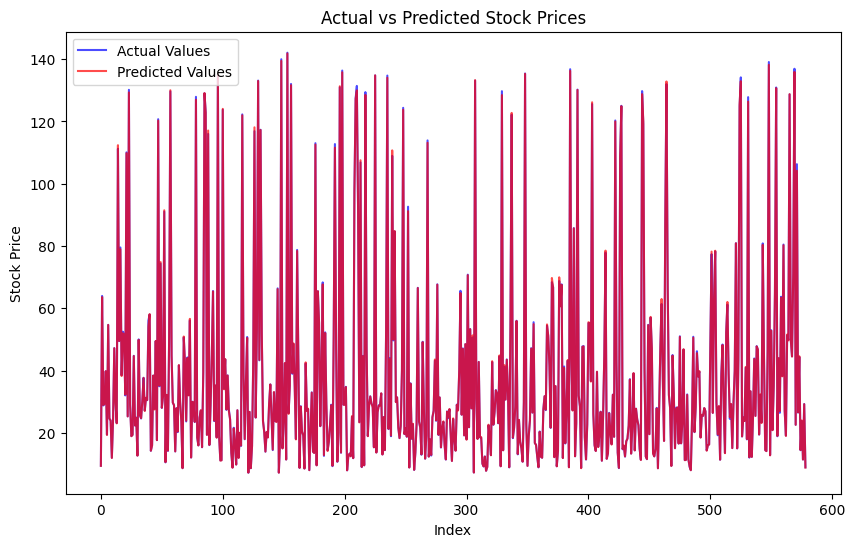

In [15]:
import matplotlib.pyplot as plt

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), y_test, label='Actual Values', color='blue', alpha=0.7)
plt.plot(range(len(y_pred)), y_pred, label='Predicted Values', color='red', alpha=0.7)
plt.title("Actual vs Predicted Stock Prices")
plt.xlabel("Index")
plt.ylabel("Stock Price")
plt.legend()
plt.show()


In [16]:
import joblib

# Save the model to a file
model_filename = 'linear_regression_stock_model.pkl'
joblib.dump(model, model_filename)

print(f"Model saved as {model_filename}")


Model saved as linear_regression_stock_model.pkl
